In [1]:
import numpy as np

In [2]:
class GradientDescent:
    def __init__(self, feature,target,learning_rate,iterations_num):
        self.m = 0
        self.c = 0
        self.feature = feature
        self.target = target
        self.learning_rate = learning_rate
        self.n = len(feature)
        self.iterations_num = iterations_num
    
    def minimization(self):
        for i in range(self.iterations_num):
            y_predicted = self.m * self.feature + self.c
            cost = (1/self.n) * sum([val**2 for val in (self.target - y_predicted)])
            cost2 = (1/(2*self.n)) * sum([val**2 for val in (self.target - y_predicted)])
            derivatives_m = (-2/self.n) * sum(self.feature * (self.target - y_predicted))
            derivatives_c = (-2/self.n) * sum(self.target - y_predicted)
            # Update the 'm' and 'c' value
            self.m = self.m - self.learning_rate * derivatives_m
            self.c = self.c - self.learning_rate * derivatives_c
            print("m= {}, c= {}, cost= {},cost2= {} iteration {}".format(self.m, self.c, cost,cost2, i))

In [3]:
x = np.array([1,2,4,3,5])
y= np.array([1,3,3,2,5])

In [8]:
obj = GradientDescent(x,y,0.0001,1000)
obj.minimization()

m= 0.002, c= 0.0005600000000000001, cost= 9.600000000000001,cost2= 4.800000000000001 iteration 0
m= 0.003995264, c= 0.001118688, cost= 9.556915033600001,cost2= 4.7784575168000005 iteration 1
m= 0.005985803206400001, c= 0.0016760671040000003, cost= 9.514033718864932,cost2= 4.757016859432466 iteration 2
m= 0.007971628799083521, c= 0.0022321404086553605, cost= 9.471355093177891,cost2= 4.735677546588946 iteration 3
m= 0.009952751931480344, c= 0.0027869110032941796, cost= 9.42887819847207,cost2= 4.714439099236035 iteration 4
m= 0.01192918373062911, c= 0.0033403819699346325, cost= 9.386602081209217,cost2= 4.6933010406046085 iteration 5
m= 0.013900935297239765, c= 0.003892556383302268, cost= 9.34452579235826,cost2= 4.67226289617913 iteration 6
m= 0.015868017705755858, c= 0.004443437310847264, cost= 9.302648387373978,cost2= 4.651324193686989 iteration 7
m= 0.017830442004416688, c= 0.0049930278127616416, cost= 9.260968926175824,cost2= 4.630484463087912 iteration 8
m= 0.019788219215319314, c= 0.

m= 0.6511304098677833, c= 0.18406551648397365, cost= 0.9655606854853916,cost2= 0.4827803427426958 iteration 621
m= 0.6515874836561838, c= 0.1841980251347562, cost= 0.9632878730374657,cost2= 0.48164393651873283 iteration 622
m= 0.6520434723770593, c= 0.18433023303953552, cost= 0.9610258021685727,cost2= 0.48051290108428635 iteration 623
m= 0.6524983785980061, c= 0.1844621409095014, cost= 0.9587744221057144,cost2= 0.4793872110528572 iteration 624
m= 0.6529522048805447, c= 0.18459374945416068, cost= 0.9565336823158829,cost2= 0.47826684115794144 iteration 625
m= 0.6534049537801351, c= 0.1847250593813415, cost= 0.9543035325049312,cost2= 0.4771517662524656 iteration 626
m= 0.65385662784619, c= 0.18485607139719717, cost= 0.9520839226164401,cost2= 0.4760419613082201 iteration 627
m= 0.6543072296220901, c= 0.18498678620621, cost= 0.9498748028305976,cost2= 0.4749374014152988 iteration 628
m= 0.6547567616451978, c= 0.1851172045111955, cost= 0.9476761235630792,cost2= 0.4738380617815396 iteration 62

In [9]:
y_pred = 0.8015602580000478*5 + 0.3943669735526445
print(int(y_pred))

4


## Gradient for Multiple variable

### Code structure
We define the following methods in the class Regressor:

1) __init__: In the __init__ method, we initialize all the parameters with default values. These parameters are added as and when required. For now, you will see that all the parameters are initialized beforehand. But while coding, you create new variables as and when needed.

2) initialize_weights_and_bias: In the initialize_weights_and_bias method, the weights and biases are initialized. We use random initialization to initialize the weights, and the bias is initially 0.

3) computeError: This function calculates the error or loss function and returns the cost. The input to this function is the predicted output and the actual output.

4) optimize: This function uses stochastic gradient descent to optimize the loss function. We initially compute the gradients of the weights and the bias in the variables dW and db. Using these gradients, we updated our weights and biases iteratively.

5) normalize: This function subtracts the mean from the data and divides it by its standard deviation. This ensures the data is centered around 0, and the standard deviation is always 1. Data with such distribution is easier to work with and results in the model learning better. This is because various features have various scales. The larger values may end up contributing more to the output. Hence, normalization ensures no such anomalies take place.

6) fit: The fit method calls all the above functions. In this method, we perform normalization on the input features and compute the loss. Once the loss is computed, we optimize the loss function by applying the optimize function on the input-output pair. We perform this until there is no significant change in the loss values obtained after training.

7) predict: This function is used to test the model on unseen data. The input to the function is the input data. The predict function outputs the dependent variable.

8) plot: In this method, we plot the loss function versus the number of iterations.

9) score: This function calculates the accuracy. The accuracy is computed using the following formula:

$$ accuracy = \frac{(y - \hat{y})^2}{\sum{_i}^n(y-\bar{y})^2}$$

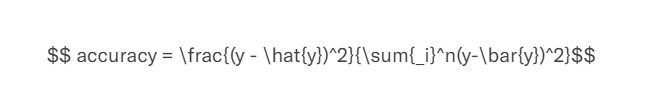

In [10]:
import numpy as np
import matplotlib.pyplot as plt
# Define Regressor class
class Regressor():
    # init method initializes all parameters needed to implement regression
    def __init__(self, learning_rate=0.01, tol=0.01, seed=None,normalize=False):
        self.W = None
        self.b = None
        self.__lr = learning_rate
        self.__tol = tol
        self.__length = None
        self.__normalize = normalize
        self.__m = None
        self.__costs = []
        self.__iterations = []
        np.random.seed(seed if seed is not None else np.random.randint(100))
    # random initialization of weights and bias
    def __initialize_weights_and_bias(self):
        self.W = np.random.randn(self.__length) #(n,1)
        self.b = 0
    # compute the error function: sum of squared errors 
    def __computeCost(self,h,Y):
        loss = np.square(h-Y)
        cost = np.sum(loss)/(2*self.__m)
        return cost
    # implement optimization function
    def __optimize(self,X,Y):
        h = np.dot(X,self.W)+self.b
        dW = np.dot( X.T, (h-Y) ) / self.__m
        db = np.sum( h-Y )  / self.__m
        self.W = self.W - self.__lr*dW
        self.b = self.b - self.__lr*db
    # normalize the dataset by subtracting the mean and dividing by std deviation
    def __normalizeX(self,X):
        return (X-self.__mean) / (self.__std)
    # fit the model to the dataset: training process
    def fit(self, X, y, verbose=False):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,i = float('inf'),0
        while True:
            h = np.dot(X,self.W)+self.b
            cost = self.__computeCost(h,y)
            if verbose:
                print(f"Iteration: {i}, Cost: {cost:.3f}")
            self.__optimize(X,y)
            if last_cost-cost < self.__tol:
                break
            else:
                last_cost,i = cost,i+1
            self.__costs.append(cost)
            self.__iterations.append(i)
    # test the model on test data
    def predict(self,X):
        if self.__normalize:
            X = self.__normalizeX(X)
        return np.dot(X,self.W)+self.b
    
    # plot the iterations vs cost curves
    def plot(self,figsize=(7,5)):
        plt.figure(figsize=figsize)
        plt.plot(self.__iterations,self.__costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title("Iterations vs Cost")
        plt.show()
    # calculates the accuracy
    def score(self,X,y):
        return 1-(np.sum(((y-self.predict(X))**2))/np.sum((y-np.mean(y))**2))

X_train:(455, 13)
y_train:(455,)
Train Score: 0.7195987085662735
Test Score:  0.5995248935884342


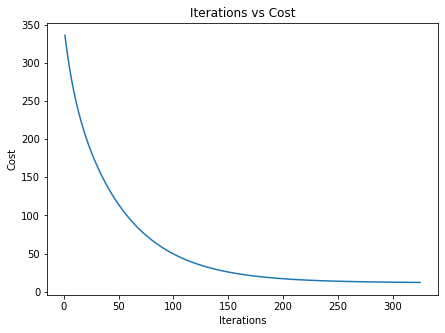

In [11]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

data = load_boston()
# split the dataset into train and test sets
X_train, X_test, y_train,y_test = train_test_split(data.data, data.target,test_size=0.1)
# print train and test set shapes
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
# normalize the dataset and instantiate Regressor object
regressor = Regressor(normalize=True)
# call the fit method
regressor.fit(X_train,y_train)

train_score = regressor.score(X_train,y_train)
test_score = regressor.score(X_test,y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
regressor.plot()